<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/TrkAna_RecoPulses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uproot
#!pip install git+https://github.com/oksuzian/Mu2eANL.git@master#egg=Macros/plotter.py

     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 92kB 6.1MB/s 


In [2]:
import sys
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plotly import graph_objs as go
import pylab
import seaborn as sns
#import plotter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [6]:
!ls -Sltr '/content/drive/My Drive/root_files/'

total 77776
-rw------- 1 root root  2139560 Jul  1 20:19 CRY0220.root
-rw------- 1 root root  3852615 Jul  1 20:20 DYB0520.root
-rw------- 1 root root 57804840 Jul  2 15:05 FullDYB.root
-rw------- 1 root root  4969749 Jul  2 15:05 DYB_100K_EV.root
-rw------- 1 root root  4986803 Jul  2 15:05 CRY_100K_EV.root
-rw------- 1 root root  2104688 Jul  6 20:09 CRY0220_Stg1.root
-rw------- 1 root root  3782439 Jul  6 20:10 DYB0520_Stg1.root


In [ ]:
def plot2d(crvdf_colx, crvdf_coly, padx, pady):
    ax[padx,pady].hist2d(crvdf_colx, crvdf_coly, bins=(200, 200), cmap=plt.cm.rainbow, norm=mcolors.LogNorm())
    ax[padx,pady].set_aspect('equal')
    ax[padx,pady].set_xlabel(crvdf_colx.name)
    ax[padx,pady].set_ylabel(crvdf_coly.name)

In [ ]:
file_cry2 = uproot.open(main_path+"root_files/cry2_new15July2019.root")
file_lo16 = uproot.open(main_path+"root_files/trkana.round9.lo16.root")
file_lo14 = uproot.open(main_path+"root_files/trkana.round10.lo14.root")
file_hi14 = uproot.open(main_path+"root_files/trkana.round10.hi14.root")
file_all  = uproot.open(main_path+"root_files/trkana.round10.all.root")

trkana_cry2  = file_cry2["TrkAnaNeg"]["trkana"]
trkana_lo16  = file_lo16["TrkAnaNeg"]["trkana"]
trkana_lo14  = file_lo14["TrkAnaNeg"]["trkana"]
trkana_hi14  = file_hi14["TrkAnaNeg"]["trkana"]
trkana_all   =  file_all["TrkAnaNeg"]["trkana"]

In [ ]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

In [ ]:
def find_best_crv_match(dfname):
  dfname["crvinfomc__x_best"] = [twstart[index] 
                                       if index>=0 else 0 
                                       for index, twstart in zip(dfname["bestcrv"], dfname["crvinfomc__x"])]                                       
  dfname["crvinfomc__y_best"] = [twstart[index] 
                                       if index>=0 else 0 
                                       for index, twstart in zip(dfname["bestcrv"], dfname["crvinfomc__y"])]
  dfname["crvinfomc__z_best"] = [twstart[index] 
                                       if index>=0 else 0 
                                       for index, twstart in zip(dfname["bestcrv"], dfname["crvinfomc__z"])] 

In [ ]:
df_cry2 = trkana_cry2.pandas.df(flatname=default_flatname, flatten=False)
df_lo16 = trkana_lo16.pandas.df(flatname=default_flatname, flatten=False)
df_lo14 = trkana_lo14.pandas.df(flatname=default_flatname, flatten=False)
df_hi14 = trkana_hi14.pandas.df(flatname=default_flatname, flatten=False)
df_all  = trkana_all.pandas.df(flatname=default_flatname, flatten=False )

In [ ]:
find_best_crv_match(df_cry2)
find_best_crv_match(df_lo16)
find_best_crv_match(df_lo14)
find_best_crv_match(df_hi14)
find_best_crv_match(df_all)


In [ ]:
def make_cuts(dfname):
  dfname_cut  = dfname.loc[
      (dfname['ue_status'] < 0) 
    & (dfname['deent_td'] > 0.57735027) 
    & (dfname['deent_td'] < 1.0)
    & (dfname['deent_d0'] > -80)
    & (dfname['deent_d0'] < 105)
    & ((dfname['deent_d0'] + 2./dfname['deent_om']) > 450)
    & ((dfname['deent_d0'] + 2./dfname['deent_om']) < 680)
    & (dfname['dequal_TrkQual'] > 0.8) 
    & (dfname['dequal_TrkPID'] > 0.9)
    & (dfname['dequal_TrkPID'] > 0.5)
#    &  (dfname['bestcrv'] < 0)
    ] 
  return dfname_cut

# Low energy deposition events distributions at the CRV and DS

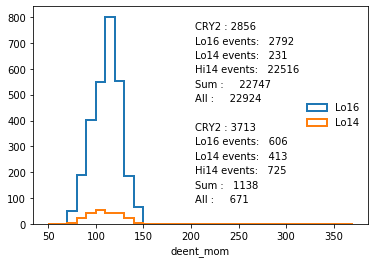

In [ ]:
import numpy as np

dfcut_cry2 = make_cuts(df_cry2)
dfcut_lo16 = make_cuts(df_lo16)
dfcut_lo14 = make_cuts(df_lo14)
dfcut_hi14 = make_cuts(df_hi14)
dfcut_all = make_cuts(df_all)

#cry2_livetime = 1/1.3
#lo16_livetime = 1/1.74
#lo14_livetime = 1/14.3
#hi14_livetime = 1/0.259
#all_livetime = 1/0.234

cry2_livetime = 1/1.3
lo16_livetime = 1/0.21708
lo14_livetime = 1/1.78795
hi14_livetime = 1/0.03220
all_livetime = 1/0.02927

#hi14_livetime = 1
#all_livetime = 1

#sns.distplot(dfcut_cry2['deent_mom'], bins=range(50, 380, 10),  kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": cry2_livetime*np.ones_like(dfcut_cry2['deent_mom'])}, label="CRY2")
#sns.distplot(dfcut_hi14['deent_mom'], bins=range(50, 380, 10), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": hi14_livetime*np.ones_like(dfcut_hi14['deent_mom'])}, label="Hi14")
sns.distplot(dfcut_lo16['deent_mom'], bins=range(50, 380, 10), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": lo16_livetime*np.ones_like(dfcut_lo16['deent_mom'])}, label="Lo16")
sns.distplot(dfcut_lo14['deent_mom'], bins=range(50, 380, 10), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": lo14_livetime*np.ones_like(dfcut_lo14['deent_mom'])}, label="Lo14")
#sns.distplot(dfcut_all['deent_mom'], bins=range(50, 380, 10), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": all_livetime*np.ones_like(dfcut_all['deent_mom'])}, label="All")
plt.figtext(0.5,0.80, "CRY2 : "+str(round(cry2_livetime*len(dfcut_cry2.index))))
plt.figtext(0.5,0.75, "Lo16 events:   "+str(round(lo16_livetime*len(dfcut_lo16.index))))
plt.figtext(0.5,0.70, "Lo14 events:   "+str(round(lo14_livetime*len(dfcut_lo14.index))))
plt.figtext(0.5,0.65, "Hi14 events:   "+str(round(hi14_livetime*len(dfcut_hi14.index))))
plt.figtext(0.5,0.6, "Sum :     "+str( round(  hi14_livetime*len(dfcut_hi14.index) +  lo14_livetime*len(dfcut_lo14.index) )))
plt.figtext(0.5,0.55, "All :     "+str(round(all_livetime*len(dfcut_all.index))))

plt.figtext(0.5,0.45, "CRY2 : "+str(round(len(dfcut_cry2.index))))
plt.figtext(0.5,0.4, "Lo16 events:   "+str(round(len(dfcut_lo16.index))))
plt.figtext(0.5,0.35, "Lo14 events:   "+str(round(len(dfcut_lo14.index))))
plt.figtext(0.5,0.3, "Hi14 events:   "+str(round(len(dfcut_hi14.index))))
plt.figtext(0.5,0.25, "Sum :   "+str(round(len(dfcut_hi14.index) + len(dfcut_lo14.index) )))
plt.figtext(0.5,0.2, "All :     "+str(round(len(dfcut_all.index))))

plt.legend(loc='center right', frameon=False)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



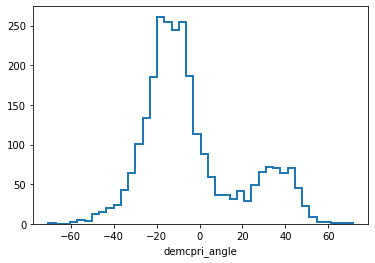

In [ ]:
import math 
dfcut_cry2['demcpri_mom']=(dfcut_cry2['demcpri_momz']*dfcut_cry2['demcpri_momz']+dfcut_cry2['demcpri_momy']*dfcut_cry2['demcpri_momy']+dfcut_cry2['demcpri_momx']*dfcut_cry2['demcpri_momx'])**(1/2)
dfcut_cry2['demcpri_angle']=np.arctan(dfcut_cry2['demcpri_momz']/dfcut_cry2['demcpri_momy'])*180/3.14
#dfcut_cry2['demcpri_angle']=dfcut_cry2['demcpri_momz']/dfcut_cry2['demcpri_momy']
# Upstream portion of CRV
dfcutz_cry2 = dfcut_cry2.loc[(dfcut_cry2['crvinfomc__z_best'] < 10000)]
# CRV-Top only
dfcuty_cry2 = dfcut_cry2.loc[(dfcut_cry2['crvinfomc__y_best'] > 2760)]
sns.distplot(dfcuty_cry2['demcpri_angle'], kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1})

In [ ]:
list(dfcut_cry2.columns)

In [ ]:
dfcut_all[['demc_pdg', 'deent_mom', 'demcpri_momz']]

In [ ]:
dfcut_lo14[['demc_pdg', 'deent_mom', 'demcpri_momz']]

In [ ]:
dfcut_hi14[['demc_pdg', 'deent_mom', 'demcpri_momz']]

Text(0.5, 0.7, 'Resampled :     56838')

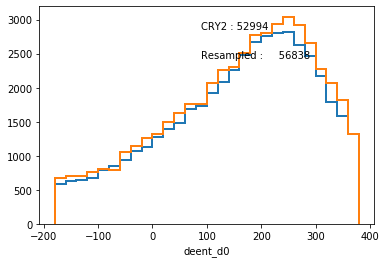

In [ ]:
sns.distplot(dfcut_cry2['deent_d0'], bins=range(-180, 400, 20),  kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": cry2_livetime*np.ones_like(dfcut_cry2['deent_d0'])}, label="CRY2")
#sns.distplot(dfcut_low16['deent_d0'], bins=range(-180, 400, 20), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": low16_livetime*np.ones_like(dfcut_low16['deent_d0'])}, label="Low16")
sns.distplot(dfcut_all['deent_d0'], bins=range(-180, 400, 20), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": all_livetime*np.ones_like(dfcut_all['deent_d0'])}, label="All")
plt.figtext(0.5,0.80, "CRY2 : "+str(round(cry2_livetime*len(dfcut_cry2.index))))
#plt.figtext(0.5,0.75, "Low events:   "+str(round(low16_livetime*len(dfcut_low16.index))))
plt.figtext(0.5,0.70, "Resampled :     "+str(round(all_livetime*len(dfcut_all.index))))

ValueError: ignored

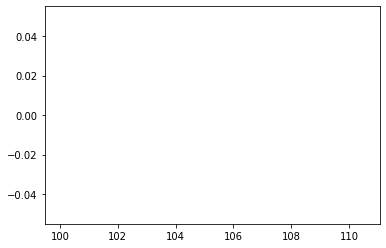

In [ ]:
sns.distplot(dfcut_lo16['deent_d0'], bins=range(-180, 400, 2), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": lo16_livetime*np.ones_like(dfcut_lo14['deent_d0'])}, label="Low14")
sns.distplot(dfcut_lo14['deent_d0'], bins=range(-180, 400, 2), kde=False, hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "weights": lo14_livetime*np.ones_like(dfcut_lo16['deent_d0'])}, label="Low16")
#plt.figtext(0.5,0.75, "Low events:   "+str(round(low16_livetime*len(dfcut_lo16.index))))
plt.figtext(0.5,0.70, "Resampled :     "+str(round(all_livetime*len(dfcut_all.index))))

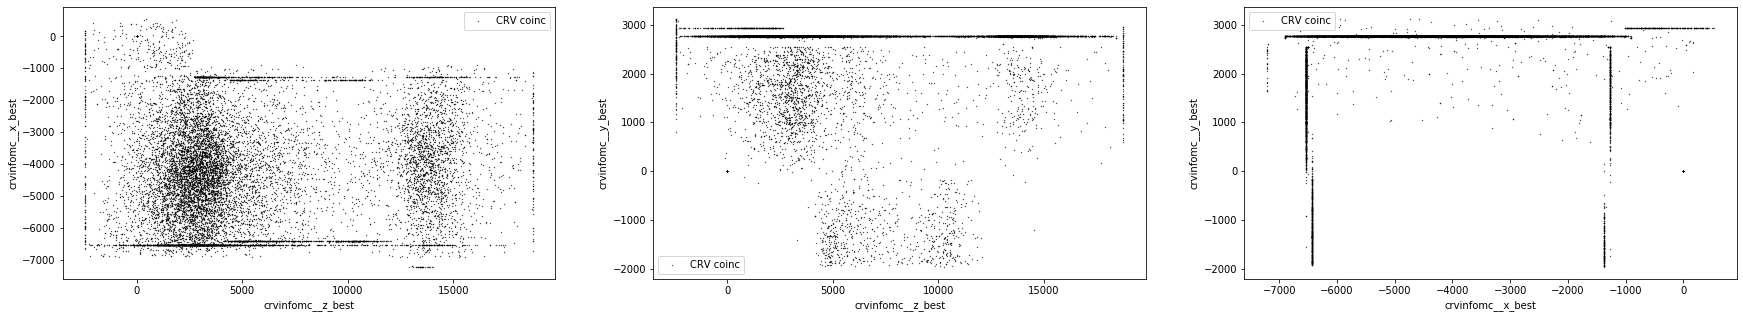

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(30,5), squeeze=False)
dfcut_all.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__x_best', c='Black', s=0.1, ax=axes[0,0], label='CRV coinc')
dfcut_all.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,1], label='CRV coinc')
dfcut_all.plot.scatter(x='crvinfomc__x_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,2], label='CRV coinc')

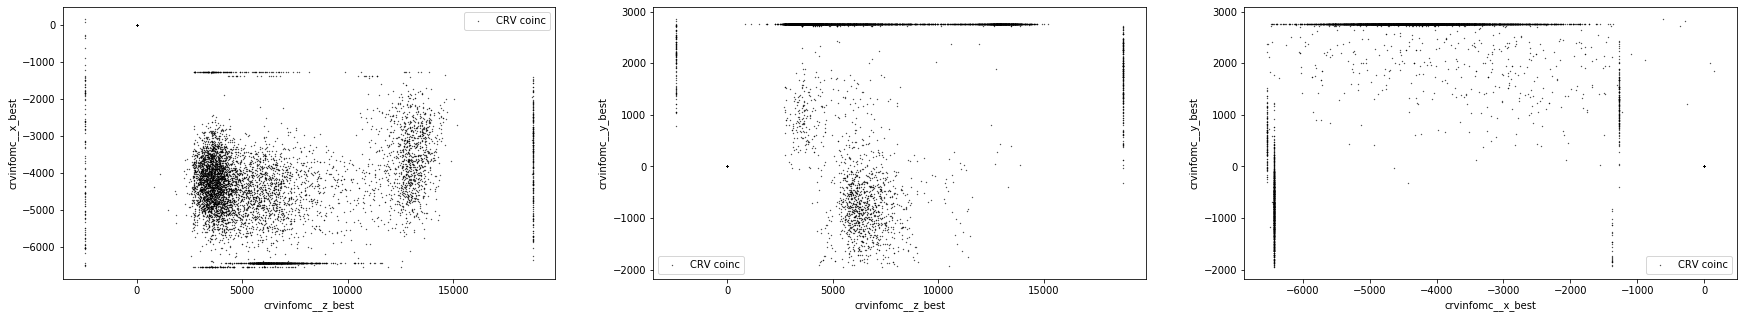

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(30,5), squeeze=False)
dfcut_lo16.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__x_best', c='Black', s=0.1, ax=axes[0,0], label='CRV coinc')
dfcut_lo16.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,1], label='CRV coinc')
dfcut_lo16.plot.scatter(x='crvinfomc__x_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,2], label='CRV coinc')

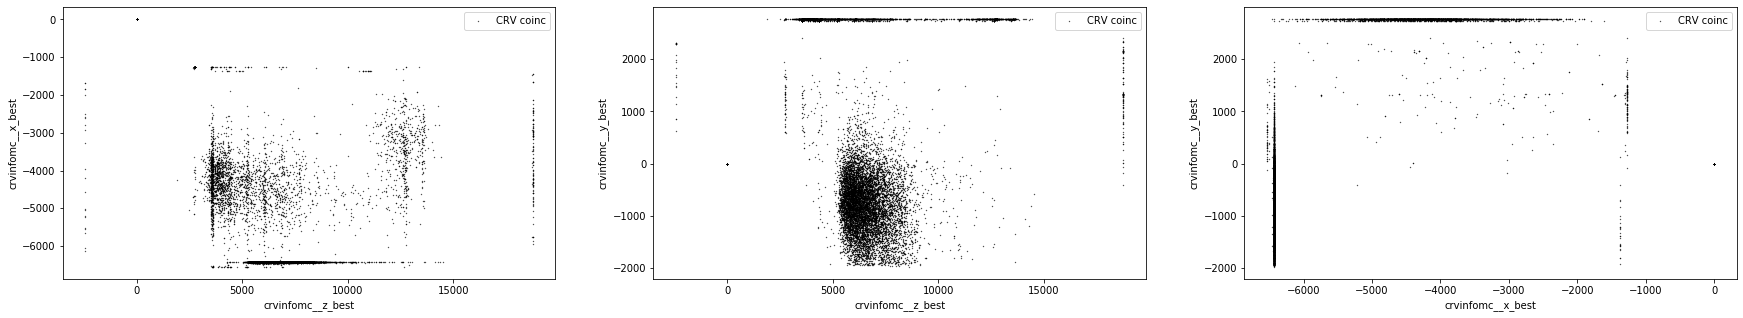

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(30,5), squeeze=False)
dfcut_lo14.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__x_best', c='Black', s=0.1, ax=axes[0,0], label='CRV coinc')
dfcut_lo14.plot.scatter(x='crvinfomc__z_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,1], label='CRV coinc')
dfcut_lo14.plot.scatter(x='crvinfomc__x_best', y='crvinfomc__y_best', c='Black', s=0.1, ax=axes[0,2], label='CRV coinc')

# Low energy deposition events distributions at the CRV and DS: ALL

''

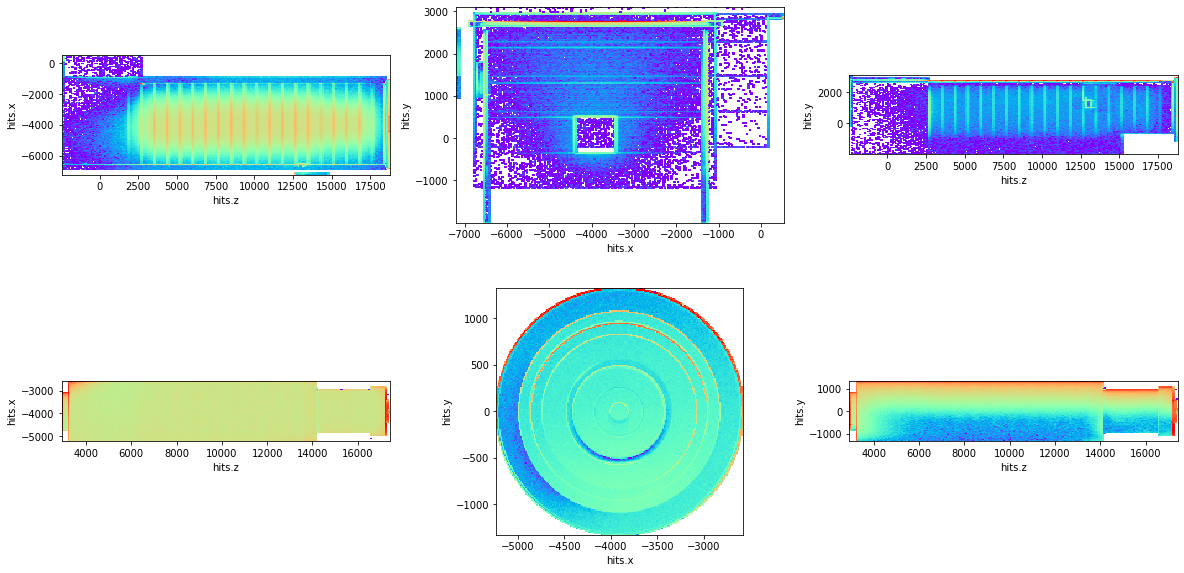

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plot2d(cvdf['hits.z'], cvdf['hits.x'], 0, 0)
plot2d(cvdf['hits.x'], cvdf['hits.y'], 0, 1)
plot2d(cvdf['hits.z'], cvdf['hits.y'], 0, 2)

plot2d(dsdf['hits.z'], dsdf['hits.x'], 1, 0)
plot2d(dsdf['hits.x'], dsdf['hits.y'], 1, 1)
plot2d(dsdf['hits.z'], dsdf['hits.y'], 1, 2)
;

# Low energy deposition events distributions at the CRV and DS

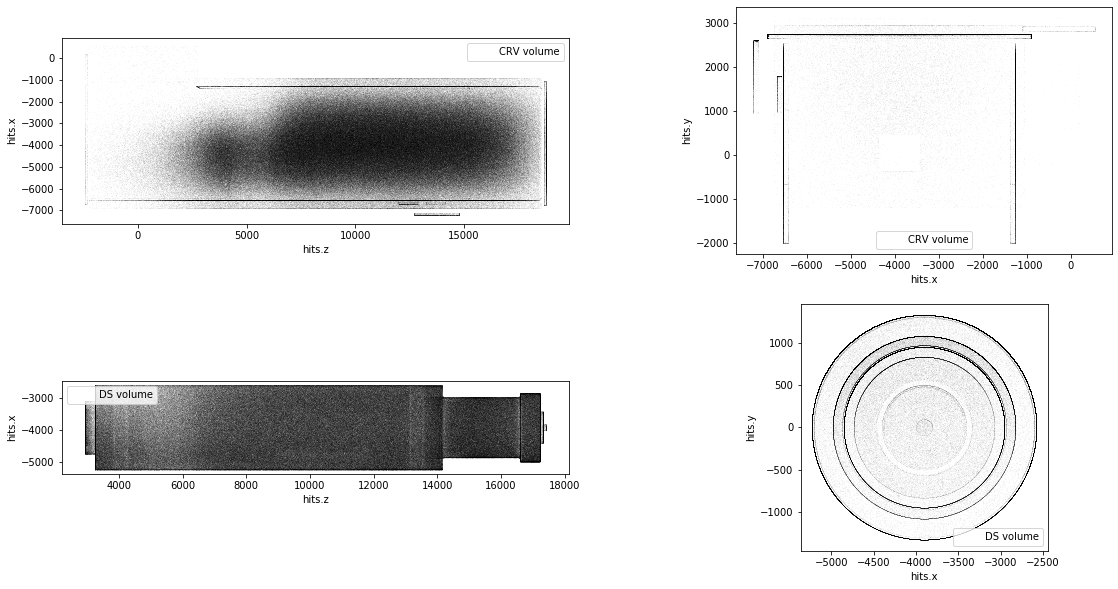

In [ ]:
dsdfcut = dsdf.loc[(dsdf['hits.pdgId'] == 2112)]
cvdfcut = cvdf.loc[(cvdf['hits.pdgId'] == 2112)]

fig, axes = plt.subplots(2, 2,figsize=(20,10))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

cvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[0,0], label='CRV volume')
cvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[1,1], label='DS volume')

# Gap muons distributions at the CRV and DS

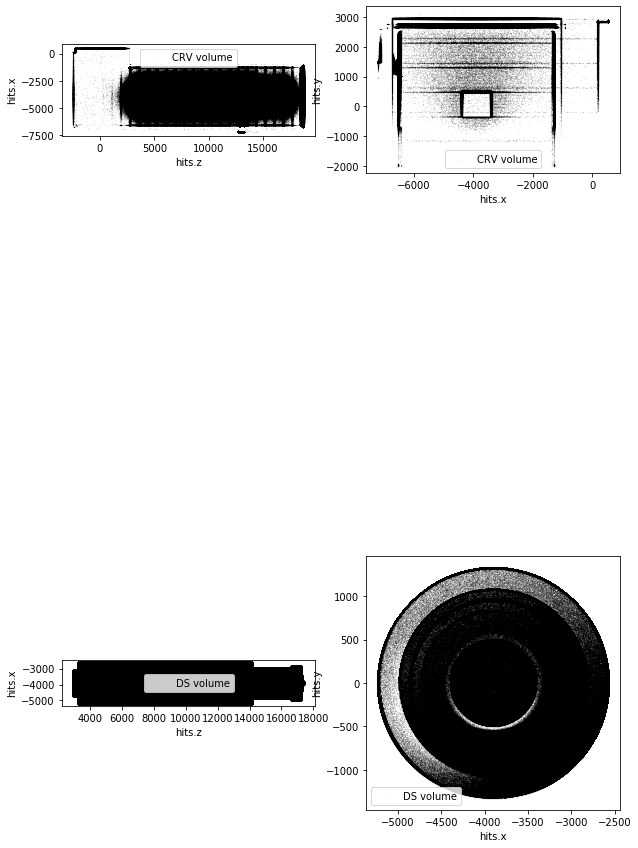

In [ ]:
dsdfcut = dsdf.loc[(dsdf['hits.pdgId'] == 13)]
cvdfcut = cvdf.loc[(cvdf['hits.pdgId'] == 13)]

fig, axes = plt.subplots(2, 2,figsize=(10,20))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

cvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[0,0], label='CRV volume')
cvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[1,1], label='DS volume')


#Energy distributions at DS

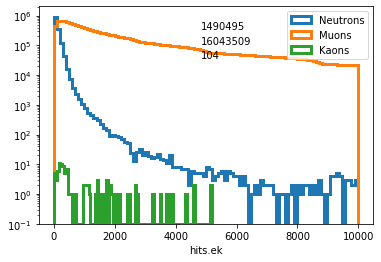

In [ ]:
neutr = dsdf.loc[(dsdf['hits.ek'] < 10000) & (dsdf['hits.pdgId'] == 2112)]
muons = dsdf.loc[(dsdf['hits.ek'] < 10000) & (abs(dsdf['hits.pdgId']) == 13)]
kaons = dsdf.loc[(dsdf['hits.ek'] < 10000) & (dsdf['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(dsdf.loc[dsdf['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(dsdf.loc[abs(dsdf['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(dsdf.loc[dsdf['hits.pdgId'] == 130].index))
plt.legend()


#Energy distributions at CRV

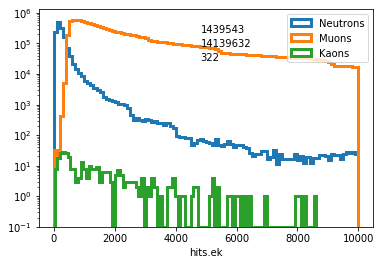

In [ ]:
neutr = cvdf.loc[(cvdf['hits.ek'] < 10000) & (cvdf['hits.pdgId'] == 2112)]
muons = cvdf.loc[(cvdf['hits.ek'] < 10000) & (abs(cvdf['hits.pdgId']) == 13)]
kaons = cvdf.loc[(cvdf['hits.ek'] < 10000) & (cvdf['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(cvdf.loc[cvdf['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(cvdf.loc[abs(cvdf['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(cvdf.loc[cvdf['hits.pdgId'] == 130].index))
plt.legend()

In [ ]:
cvdf['hits.ek'].loc[cvdf['hits.pdgId'] == 2112].describe().loc[['mean','std','count']]


mean     2.885597e+02
std      7.594592e+02
count    1.439543e+06
Name: hits.ek, dtype: float64

In [ ]:
cvdf['hits.ek'].loc[abs(cvdf['hits.pdgId']) == 13].describe()


count    1.413963e+07
mean     5.114429e+03
std      1.428790e+04
min      2.790641e+00
25%      1.104455e+03
50%      2.176301e+03
75%      4.928880e+03
max      5.882426e+06
Name: hits.ek, dtype: float64

In [ ]:
cvdf['hits.ek'].loc[cvdf['hits.pdgId'] == 130].describe().loc[['mean','std','count']]

mean     1826.393677
std      3161.673340
count     322.000000
Name: hits.ek, dtype: float64

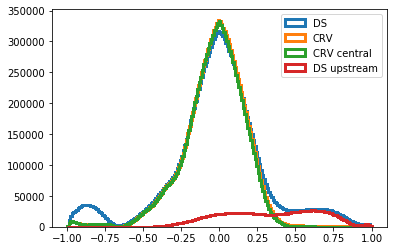

In [ ]:
muons_dsv = dsdf.loc[(abs(dsdf['hits.pdgId']) == 13)]
muons_crv = cvdf.loc[(abs(cvdf['hits.pdgId']) == 13)]

muons_dsv_upst = dsdf.loc[(abs(dsdf['hits.pdgId']) == 13) & (dsdf['hits.z'] < 4000)]
muons_crv_cent = cvdf.loc[(abs(cvdf['hits.pdgId']) == 13) & (cvdf['hits.z'] > 3000)]

sns.distplot(muons_dsv['hits.pz']/muons_dsv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS")
sns.distplot(muons_crv['hits.pz']/muons_crv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV")
sns.distplot(muons_crv_cent['hits.pz']/muons_crv_cent['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV central")
sns.distplot(muons_dsv_upst['hits.pz']/muons_dsv_upst['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS upstream")
plt.legend()

angle = muons_crv['hits.pz']/muons_crv['hits.pmag']

#sns.jointplot(x=muons_crv['hits.pz']/muons_crv['hits.pmag'], y="hits.z", data=muons_crv, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#sns.jointplot(x=angle, y="hits.z", data=muons_crv, kind="kde", space=0, color="g", ratio=1)